# Data Exploration

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data.csv')

df.head()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


In [5]:
df.describe()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,306.381356,3.727754,4.325212,2.939619,5.394068,2.842161,47.043432,4.565678,16.331568,0.416314
std,1082.606745,2.677235,1.438436,1.383725,1.269349,2.273337,16.423130,1.599287,5.974781,0.493208
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,5.000000,1.000000,34.000000,3.000000,14.000000,0.000000
50%,22.000000,3.000000,4.000000,3.000000,6.000000,2.000000,44.000000,4.000000,17.000000,0.000000
75%,110.000000,7.000000,6.000000,4.000000,6.000000,5.000000,58.000000,6.000000,21.000000,1.000000
max,7300.000000,7.000000,7.000000,7.000000,7.000000,6.000000,91.000000,7.000000,24.000000,1.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB


# Data Visualization

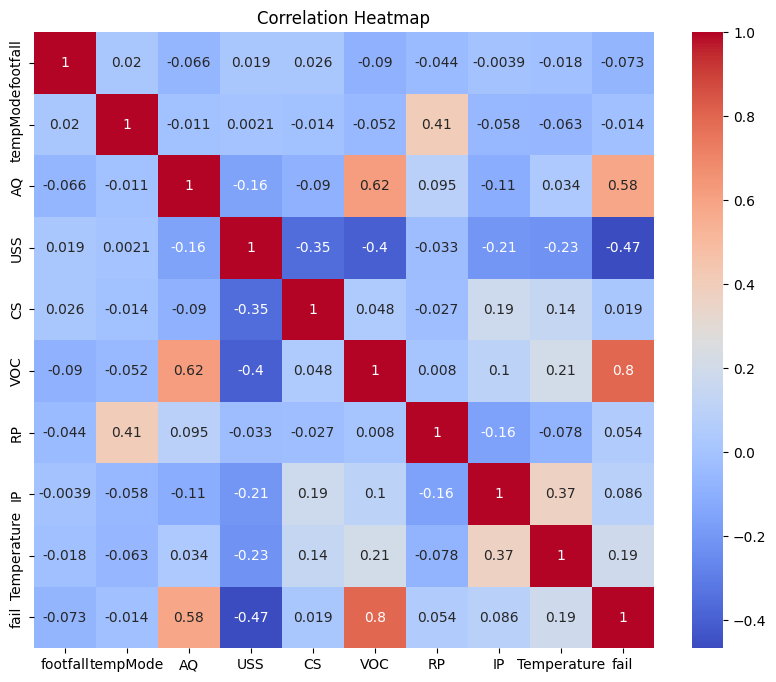

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap")
plt.show()

## Try to find some correlation between variables.

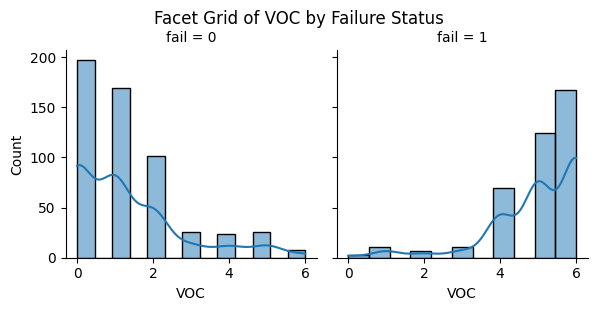

In [ ]:
feature = 'VOC'  
facet = sns.FacetGrid(df, col='fail')
facet.map(sns.histplot, feature, kde=True)
facet.add_legend()
facet.fig.suptitle(f'Facet Grid of {feature} by Failure Status', y=1.02)
plt.show()


In [11]:
df = df.drop(columns=['VOC'])

X = df.drop(columns=['fail']) 
y = df['fail'] 


In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Initial VIF calculation
vif_data = calculate_vif(X)
print("Initial VIF Data:\n", vif_data)

# Iteratively remove features with high VIF
while vif_data['VIF'].max() > 5:  # Threshold value for VIF
    highest_vif_feature = vif_data.sort_values('VIF', ascending=False).iloc[0]['Feature']
    print(f"Removing feature with high VIF: {highest_vif_feature}")
    X = X.drop(columns=[highest_vif_feature])
    vif_data = calculate_vif(X)
    print("Updated VIF Data:\n", vif_data)

Initial VIF Data:
        Feature        VIF
0     footfall   1.085987
1     tempMode   3.542750
2           AQ   8.284828
3          USS   4.220109
4           CS  13.887443
5           RP  10.196080
6           IP  10.171187
7  Temperature   9.662628
Removing feature with high VIF: CS
Updated VIF Data:
        Feature       VIF
0     footfall  1.079423
1     tempMode  3.539244
2           AQ  7.817978
3          USS  4.192709
4           RP  9.430541
5           IP  8.664178
6  Temperature  9.130364
Removing feature with high VIF: RP
Updated VIF Data:
        Feature       VIF
0     footfall  1.079184
1     tempMode  2.730884
2           AQ  6.657391
3          USS  3.945680
4           IP  8.591948
5  Temperature  8.966126
Removing feature with high VIF: Temperature
Updated VIF Data:
     Feature       VIF
0  footfall  1.078885
1  tempMode  2.722432
2        AQ  5.849228
3       USS  3.926794
4        IP  5.357582
Removing feature with high VIF: AQ
Updated VIF Data:
     Feature    

### Splitting the dataset

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Find the model

In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### Model results and interpretation.

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.71      0.71       102
           1       0.66      0.66      0.66        87

    accuracy                           0.68       189
   macro avg       0.68      0.68      0.68       189
weighted avg       0.68      0.68      0.68       189

Confusion Matrix:
 [[72 30]
 [30 57]]


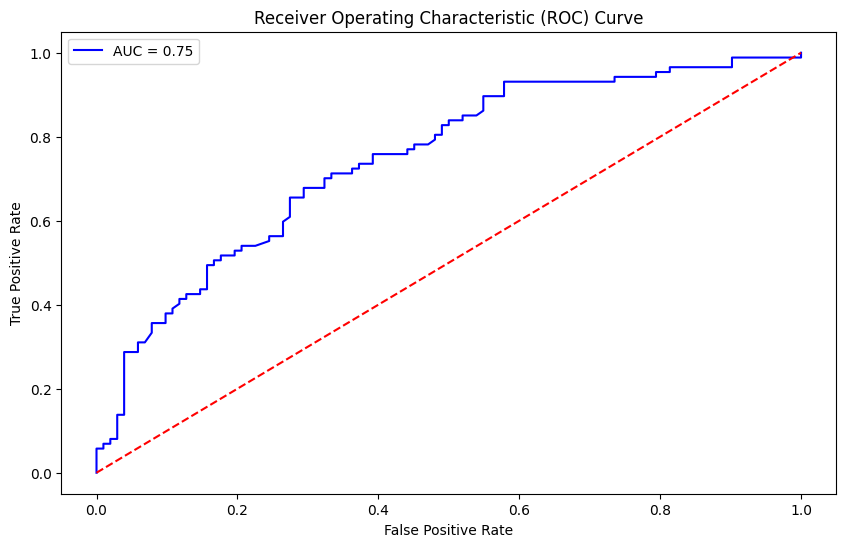

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

# Predict on the test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### The Accuracy of the model is 68%

### Hyperparameter

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

param_grid = [
    {'penalty': ['l1'], 'C': [0.1, 1, 10], 'max_iter': [500, 1000, 2000], 'solver': ['liblinear']},
    {'penalty': ['l2'], 'C': [0.1, 1, 10], 'max_iter': [500, 1000, 2000], 'solver': ['liblinear', 'lbfgs']}
]

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Add a custom constraint to ensure lbfgs only uses l2 penalty
param_grid_constraints = [
    {'solver': ['liblinear'], 'penalty': ['l1', 'l2']},
    {'solver': ['lbfgs'], 'penalty': ['l2']}
]

# Initialize the model
model = LogisticRegression()  

# Initialize the grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Train the model with the best hyperparameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Best Hyperparameters: {'C': 0.1, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Score: 0.7536423841059603
Test Accuracy: 0.6825396825396826


### After tunning it gets 75%